In [1]:
import numpy as np
import nltk
import pandas as pd
from sklearn.svm import SVC
import os
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import re
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/Users/sakshitiwari/Downloads/redataset.csv', encoding = 'latin-1' )

df['class'].value_counts()

df['class'] = np.where(df['class']=='F', 1, 0)

# # X = df['RequirementText'].values.reshape(-1,1)
X = df['RequirementText']
y = df['class']

In [3]:
df.corr()

,number,ProjectID,class
number,1.000000,0.976549,-0.133997
ProjectID,0.976549,1.000000,-0.235121
class,-0.133997,-0.235121,1.000000


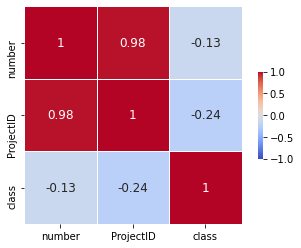

In [4]:
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

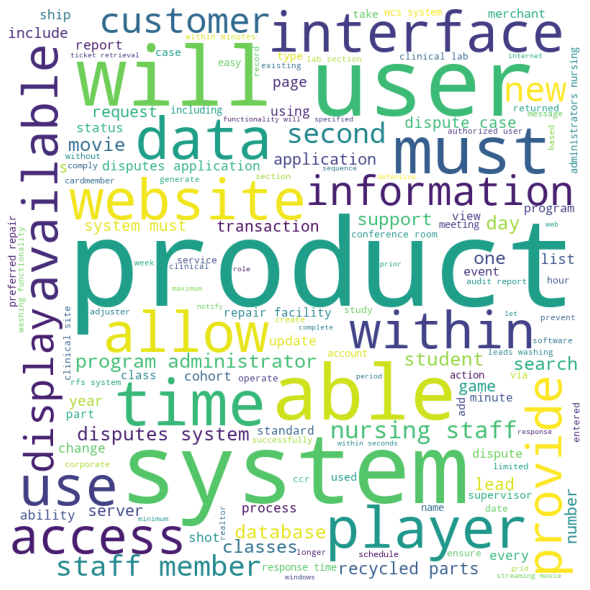

In [5]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.RequirementText:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [7]:
# df1=df.copy()
# df1.columns 
# df1=df1.drop('Unnamed: 0', axis=1)
# df1.head()
# df=df1.copy()

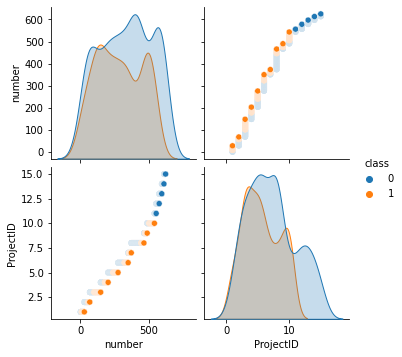

In [8]:
sns.pairplot(df, hue = 'class') 

<AxesSubplot:>

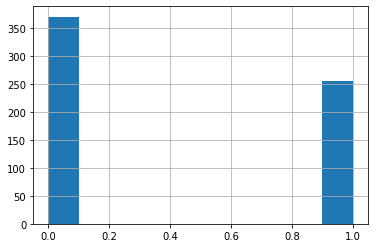

In [9]:
df['class'].hist()

In [10]:
tweet=df['RequirementText']

In [11]:
stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()
#stemmer = SnowballStemmer("english")


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    
    tweet = tweet.strip().strip('"')
    tweet = re.sub(r'[^A-Za-z0-9(),!?\.\'\`]', ' ', tweet)
    tweet = re.sub(r"\'s", " \'s", tweet)
    tweet = re.sub(r"\'ve", " \'ve", tweet)
    tweet = re.sub(r"n\'t", " n\'t", tweet)
    tweet = re.sub(r"\'re", " \'re", tweet)
    tweet = re.sub(r"\'d", " \'d", tweet)
    tweet = re.sub(r"\'ll", " \'ll", tweet)
    tweet = re.sub(r",", " , ", tweet)
    tweet = re.sub(r"\.", "  \. ", tweet)
    tweet = re.sub(r"\"", " , ", tweet)
    tweet = re.sub(r"!", " ! ", tweet)
    tweet = re.sub(r"\(", " \( ", tweet)
    tweet = re.sub(r"\)", " \) ", tweet)
    tweet = re.sub(r"\?", " \? ", tweet)
    #tweet = re.sub(r"\S{2,}", " ", tweet)
    #return tweet.strip().lower()
    
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    
    tweet = tweet.strip().strip('"')
    tweet = re.sub(r'[^A-Za-z0-9(),!?\.\'\`]', ' ', tweet)
    tweet = re.sub(r"\'s", " \'s", tweet)
    tweet = re.sub(r"\'ve", " \'ve", tweet)
    tweet = re.sub(r"n\'t", " n\'t", tweet)
    tweet = re.sub(r"\'re", " \'re", tweet)
    tweet = re.sub(r"\'d", " \'d", tweet)
    tweet = re.sub(r"\'ll", " \'ll", tweet)
    tweet = re.sub(r",", " , ", tweet)
    tweet = re.sub(r"\.", "  \. ", tweet)
    tweet = re.sub(r"\"", " , ", tweet)
    tweet = re.sub(r"!", " ! ", tweet)
    tweet = re.sub(r"\(", " \( ", tweet)
    tweet = re.sub(r"\)", " \) ", tweet)
    tweet = re.sub(r"\?", " \? ", tweet)
    #tweet = re.sub(r"\S{2,}", " ", tweet)
   # return tweet.strip().lower()
    
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )

In [12]:
#Construct tfidf matrix and get relevant scores
tfidf = vectorizer.fit_transform(tweet).toarray()
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())}
idf_vals = vectorizer.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [13]:
#Get POS tags for text and save as a string
tweet_tags = []
for t in tweet:
    tokens = basic_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags]
    tag_str = " ".join(tag_list)
    tweet_tags.append(tag_str)

In [14]:
#We can use the TFIDF vectorizer to get a token matrix for the POS tags
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
    )

In [15]:
df['RequirementText'].iloc[2]

' If projected  the data must be readable.  On a 10x10 projection screen  90% of viewers must be able to read Event / Activity data from a viewing distance of 30'

In [16]:
tweet.head(10)

0    The system shall refresh the display every 60 ...
1    The application shall match the color of the s...
2     If projected  the data must be readable.  On ...
3     The product shall be available during normal ...
4     If projected  the data must be understandable...
5    The product shall ensure that it can only be a...
6    The product shall be intuitive and self-explan...
7    The product shall respond fast to keep up-to-d...
8    The system shall have a MDI form that allows f...
9    The system shall display Events in a vertical ...
Name: RequirementText, dtype: object

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# word_bagger = text.CountVectorizer(stop_words='english', lowercase=True, )
# word_bagger.fit(X_train)

# X_train_trans = word_bagger.transform(X_train)

# func_req_RF = RandomForestClassifier()
# func_req_RF.fit(X_train_trans, y_train)

# X_test_trans = word_bagger.transform(X_test)

# func_req_RF.score(X_test_trans,y_test)

# Bag of Words Model

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(tweet).toarray()

In [19]:
tweet.head()

0    The system shall refresh the display every 60 ...
1    The application shall match the color of the s...
2     If projected  the data must be readable.  On ...
3     The product shall be available during normal ...
4     If projected  the data must be understandable...
Name: RequirementText, dtype: object

In [20]:
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
y.value_counts()

0    370
1    255
Name: class, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print (X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print (X_train.dtype.names)

None


In [25]:
y_train.count()

500

In [26]:
X_train.shape

(500, 1675)

In [27]:
# model=RandomForestClassifier()

In [28]:
# model.fit(X_train, y_train)

# Grid Search

In [29]:

# pipe = Pipeline(
#         [('select', SelectFromModel(RandomForestClassifier(max_depth = 25, min_samples_leaf = 5, min_samples_split = 4, n_estimators = 200))),
#         ('model', RandomForestClassifier(max_depth = 25, min_samples_leaf = 5, min_samples_split = 4, n_estimators = 200))])

In [30]:
# param_grid = [{}] # Optionally add parameters here

In [31]:
# grid_search = GridSearchCV(pipe, 
#                            param_grid,
#                            cv=StratifiedKFold(n_splits=5).split(X_train, y_train), 
#                            verbose=2)

## Random Forest

In [60]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [61]:
grid_search = GridSearchCV(estimator=rfc, param_grid = param_grid, cv=5, verbose=2)

In [62]:
model = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................max_features=auto, n_estimators=200; total time=   0.5s
[CV] END ................max_features=auto, n_estimators=200; total time=   0.6s
[CV] END ................max_features=auto, n_estimators=200; total time=   0.5s
[CV] END ................max_features=auto, n_estimators=200; total time=   0.3s
[CV] END ................max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ................max_features=auto, n_estimators=700; total time=   1.2s
[CV] END ................max_features=auto, n_estimators=700; total time=   1.3s
[CV] END ................max_features=auto, n_estimators=700; total time=   1.2s
[CV] END ................max_features=auto, n_estimators=700; total time=   1.2s
[CV] END ................max_features=auto, n_estimators=700; total time=   1.2s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ................max_features=sqrt, n_est

In [63]:
y_preds = model.predict(X_test)
report = classification_report(y_test, y_preds)
a=accuracy_score(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        78
           1       0.93      0.85      0.89        47

    accuracy                           0.92       125
   macro avg       0.92      0.91      0.91       125
weighted avg       0.92      0.92      0.92       125



In [64]:
print(a)

0.92


In [65]:
print (model.best_params_)

{'max_features': 'log2', 'n_estimators': 700}


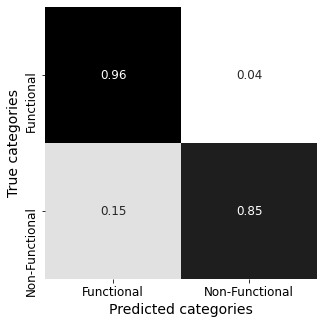

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Functional','Non-Functional']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

#Uncomment line below if you want to save the output
#plt.savefig('confusion.pdf')




## Naive Bayes


In [100]:
Multinomial_NB = MultinomialNB

In [119]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

In [120]:
multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)

In [121]:
model_mnb= multinomial_nb_grid .fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [122]:
nb_preds = model_mnb.predict(X_test)
report = classification_report(y_test, nb_preds)
a_mnb=accuracy_score(y_test, nb_preds)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        78
           1       0.86      0.94      0.90        47

    accuracy                           0.92       125
   macro avg       0.91      0.92      0.92       125
weighted avg       0.92      0.92      0.92       125



In [123]:
print(a_mnb)

0.92


In [124]:
print (model_mnb.best_params_)

{'alpha': 0.5}


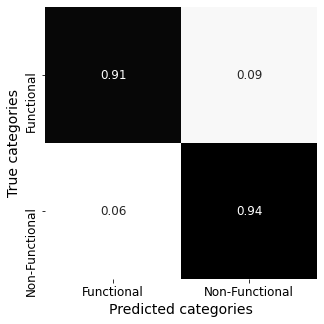

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn
confusion_matrix = confusion_matrix(y_test,nb_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Functional','Non-Functional']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

#Uncomment line below if you want to save the output
#plt.savefig('confusion.pdf')



## Support Vector Machine


In [43]:
svc_classifier = SVC()

In [148]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=5, verbose = 3)
  
# fitting the model for grid search

In [149]:
model_svc= grid.fit(X_train, y_train).fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.870 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.820 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.910 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

In [150]:
svc_preds = model_svc.predict(X_test)
report = classification_report(y_test, svc_preds)
a_svc=accuracy_score(y_test, svc_preds)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        78
           1       0.84      0.91      0.88        47

    accuracy                           0.90       125
   macro avg       0.89      0.91      0.90       125
weighted avg       0.91      0.90      0.90       125



In [151]:
print(a_svc)

0.904


In [133]:
print (model_svc.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


## KNN

In [134]:
knn = KNeighborsClassifier()

In [135]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [136]:
param_grid = dict(n_neighbors=k_range)

grid_svc = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [137]:
model_knn= grid_svc.fit(X_train, y_train).fit(X_train, y_train)

In [138]:
knn_preds = model_knn.predict(X_test)
report = classification_report(y_test, knn_preds)
a_knn=accuracy_score(y_test, knn_preds)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        78
           1       0.69      0.74      0.71        47

    accuracy                           0.78       125
   macro avg       0.76      0.77      0.77       125
weighted avg       0.78      0.78      0.78       125



In [139]:
print(a_knn)

0.776


In [140]:
print (model_knn.best_params_)

{'n_neighbors': 2}


## Logistic Regression

In [69]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(class_weight='balanced', penalty="l2", C=0.01))),
        ('model', LogisticRegression(class_weight='balanced', penalty='l2', C=0.01))])

In [70]:
param_grid = [{}] # Optionally add parameters here

In [71]:
grid_search = GridSearchCV(pipe, 
                           param_grid,
                           cv=StratifiedKFold(n_splits=5).split(X_train, y_train), 
                           verbose=2)

In [72]:
model_lr = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [73]:
lr_preds = model_lr.predict(X_test)
report = classification_report(y_test, lr_preds)
a_lr=accuracy_score(y_test, lr_preds)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        78
           1       0.70      0.85      0.77        47

    accuracy                           0.81       125
   macro avg       0.80      0.82      0.80       125
weighted avg       0.82      0.81      0.81       125



In [74]:
print(a_lr)

0.808


In [75]:
print (model_lr.best_params_)

{}


In [60]:
rf_auc = roc_auc_score(y_test, y_preds)
nb_auc = roc_auc_score(y_test, nb_preds)
svc_auc = roc_auc_score(y_test, svc_preds)
knn_auc = roc_auc_score(y_test, knn_preds)
lr_auc = roc_auc_score(y_test, lr_preds)

In [61]:
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Support Vector Machine: AUROC = %.3f' % (svc_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random Forest: AUROC = 0.911
Naive Bayes: AUROC = 0.923
Support Vector Machine: AUROC = 0.906
KNN: AUROC = 0.770
Logistic Regression: AUROC = 0.770


In [62]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_preds)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_preds)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_preds)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_preds)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)

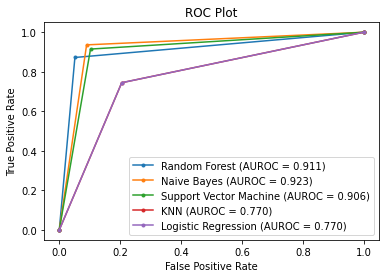

In [63]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector Machine (AUROC = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()